In [58]:
# neat text - simple NLP package for cleaning textual data and text preprocessing.
!pip install neattext
!pip install plotly

# Useful python libraries for to be used in the below file:
import os # library for importing system file paths
import numpy as np # numpy library for further analysis 
import pandas as pd # 
import re #
import matplotlib as plt # for visualisation
import plotly.express as pe # better version of plotly to have better high-level visualisation
import neattext as netxt

In [59]:
# using pandas library to convert the csv file into a dataframe , for further operations
DataSet01 = pd.read_excel('/Users/bhushanbist/Downloads/covid19_tweets.xlsx')

In [60]:
#For getting the first five rows of the dataset - vaccination_all_tweets.csv 
DataSet01.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,á‰áŽ¥â˜»Õ¬ê‚…Ï®,astroworld,wednesday addams as a disney princess keepin i...,26/05/2017 05:46,624,950,18775,False,25/07/2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðŸ‡ºðŸ‡¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",16/04/2009 20:06,2253,1677,24,True,25/07/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,28/02/2009 18:57,9275,9525,7254,False,25/07/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-07-03 01:45:00,197,987,1488,False,25/07/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðŸ–Šï¸Official Twitter handle of Department o...,2017-12-02 06:45:00,101009,168,101,False,25/07/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [61]:
# Display function used to show the total number of tweets available in the data set
display(DataSet01.shape, str(DataSet01.shape[0])+" Number of tweets available")

(179108, 13)

'179108 Number of tweets available'

In [62]:
#to get further knowledge on the data set  , we use datafram.info to know more about the columns in the dataset
DataSet01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179103 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168755 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [63]:
# checking for the null values and summing the null values in each columns
DataSet01.isna().sum()

user_name               5
user_location       36771
user_description    10353
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [64]:
# to process further we need to process the dates mentioned in the data set to date format
DataSet01['date'] = pd.to_datetime(DataSet01['date'])

In [65]:
#to get all the unique locatiosn off the dataframe
UniqueLocations = DataSet01.user_location.unique()

# To create a dataframe of all the unique values
AllUniqueLocations = pd.DataFrame(UniqueLocations)
AllUniqueLocations.shape

(26920, 1)

In [66]:
AllUniqueLocations.count() # we have total 25459 locations unique in the current data set 

0    26919
dtype: int64

<AxesSubplot:>

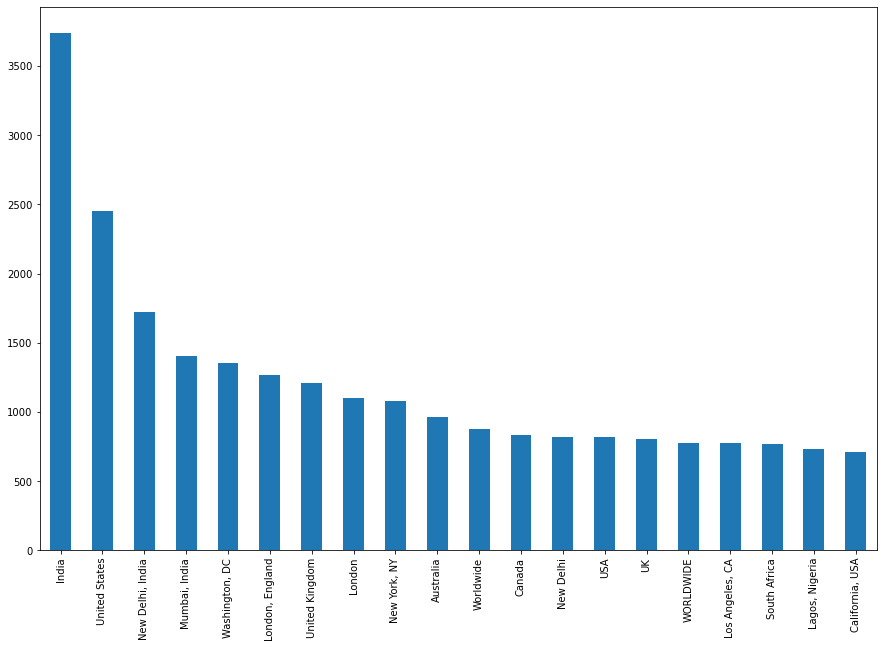

In [67]:
# extracting unique enteries from each region in the data set, total lenth is same as per the above unique locations, 
UserLocationToTweetCount = DataSet01['user_location'].value_counts().nlargest(30)
UserLocationToTweetCount
#plot to show the above data
plt.rcParams["figure.figsize"] = (15,10)
UserLocationToTweetCount.nlargest(20).plot(kind='bar')

In [68]:
# checking for the number of duplicate tweets, shows all duplicate tweets and the count
DataSet01.groupby(['text']).size().reset_index(name='count')
DataSet01['text'].count()

179108

In [69]:
# as seen there are total 226373 duplicate tweets, dropping them for further analysis
DataSet01 = DataSet01.drop_duplicates('text')

In [70]:
DataSet01['text'].count()

178683

In [71]:
DataSet01.source.value_counts()

Twitter Web App              56846
Twitter for Android          40130
Twitter for iPhone           35458
TweetDeck                     8527
Hootsuite Inc.                7317
                             ...  
Ontario_Covid19                  1
Dear_Assistant                   1
That Best Home Automation        1
NippyTweet                       1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

<AxesSubplot:>

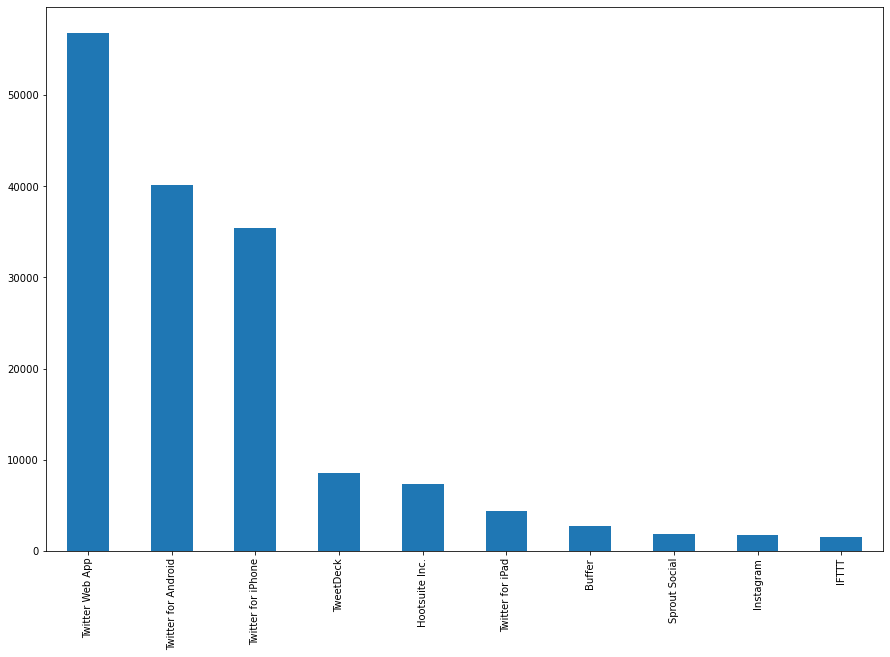

In [72]:
plt.rcParams["figure.figsize"] = (15,10)
DataSet01['source'].value_counts().nlargest(10).plot(kind='bar')

In [73]:
DataSet01[(DataSet01['user_location'] == 'Ireland') | (DataSet01['user_location'] == 'ireland')]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
98,The GAA,Ireland,Gaelic Athletic Association/Cumann LÃºthchleas...,13/11/2009 13:40,398260,150,2864,True,2020-07-25 12:24:00,You can all #PlayYourPart in the fight against...,"['PlayYourPart', 'Covid19', 'InThisTogether']",Twitter for iPhone,False
939,GPA,Ireland,The Gaelic Players Association is dedicated to...,2009-03-03 20:14:00,37137,2465,1769,False,2020-07-25 12:00:00,You can all #PlayYourPart in the fight against...,"['PlayYourPart', 'Covid19', 'InThisTogether']",Twitter Media Studio,False
1090,IrishMa,Ireland,#Ireland #Comedy #FenianBranch #Parody Trying ...,17/03/2020 14:29,2419,2062,45940,False,2020-07-25 11:55:00,New overalls ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£ #COVID19 #Sa...,"['COVID19', 'SaturdayMotivation']",Twitter for iPhone,False
1287,Billy Linehan #CrushtheCurve,Ireland,Small business adviser | mentor | @Celtar_Advi...,15/06/2009 13:12,2278,3245,29515,False,2020-07-25 11:48:00,"On RTE radio 1, the #marian show with @RadioBr...",['marian'],Twitter for Android,False
1430,The Alzheimer Society of Ireland,Ireland,We are the leading support service & advocacy ...,2009-08-12 21:53:00,10871,3382,8432,True,2020-07-25 11:42:00,The lack of support for and recognition of fam...,NaN,Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175812,Truth & Justice,Ireland,Speaking out about the Malpractice in Hospital...,2015-03-08 15:24:00,1603,2079,34439,False,2020-08-29 23:00:00,Who is #FionaGate at South Dublin Co Council c...,"['FionaGate', 'COVID19']",Twitter Web App,False
176260,Tracey Walker,Ireland,"Love to travel, cook, cocktail night and sport...",31/03/2011 15:29,648,2236,15132,False,2020-08-29 22:29:00,Neighbours in apartment across the road have a...,NaN,Twitter for Android,False
177717,Darragh Bohan,Ireland,"23, Sligo. Work in Public Service. Study Law i...",2011-08-08 20:54:00,587,5000,6962,False,2020-08-29 21:03:00,This is not good... Almost every county on dai...,['COVID19'],Twitter for Android,False
177974,Tim White,Ireland,"Techie, Gadget lover, Software developer, musi...",2010-01-09 12:00:00,267,241,10270,False,2020-08-29 20:50:00,For all those saying that because hospitalisat...,['COVID19'],Twitter for Android,False
